# Project Title
### Data-Driven Property Renovation Strategies: Maximizing Market Value

**Authors:** Irking Chua
***

# Overview

The project is a good indicator to present what I have learned in Phase 2 and apply it using real world data. Through data analysis and linear regression, we aim to produce at least 3 key insights that will aid in the decision making if renovating old houses is profitable. It is important to understand what affects the price of the house

# Business  Problem

The real estate agency aims to provide strategic guidance to prospective homebuyers who intend to purchase and renovate properties. This guidance should identify key renovation priorities that will maximize the property's market value increase, along with estimated value increments to optimize their resale potential.

# Exploratory Data Analysis

This dataset that we are using for this model comes from houses in King County, Washington, USA that were sold from 2014 to 2015. It contains 21,597 entries that includes the statistics of the house (bedroom, bathroom,) and its rating (grade)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("data\kc_house_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# Checking duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [7]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

To make the data more readable we can drop these data as it is relative that this is connected to the target variable price
- date - as it just says when the house it was sold
- sqft_lot15 and sqft_living15 - serves for how big the houses of others
- lat and long are the coordinates of the house
- view if it the house has been viewed
- id is the personal identification number of the house listed
- zipcode - this will not affect the outcome as prices of the house through renovation is not connected by their zipcode

In [8]:
to_drop = ['date', 'view', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id']
data = data.drop(to_drop, axis = 1)

In [9]:
# Now we can check if there are any missing values in our data
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
dtype: int64

In [10]:
# We found out upon exploration that sqft_basement has some unknown values ?
data['sqft_basement'].value_counts()

sqft_basement
0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [11]:
# We found out that there are 454 missing values in the sqft_basement data so we will replace the ? and turn it into 0
# so we can make the data usable
data['sqft_basement'] = data['sqft_basement'].replace('?', 0)

In [12]:
# We can see that waterfront also has some missing data so we can try to put 0 to them so we can use the data
data['waterfront'].unique()

array([nan,  0.,  1.])

In [13]:
# upon inspection there are missing data that we can fill in with 0
data['waterfront'].fillna(value = 0, inplace = True)

In [14]:
# We found out that there are 454 missing values in the sqft_basement data so we will replace the ? and turn it into 0
# so we can make the data usable
data['sqft_basement'] = data['sqft_basement'].replace('?', 0)

In [15]:
# We also found yr_renovated has some missing data
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
# upon inspection there are missing data that we can fill in with 0
data['yr_renovated'].fillna(value = 0, inplace = True)

In [17]:
# Upon further inspection using float in models doesn't work well so we will multiply the bathrooms by 100 so we can fully use the data
data['bathrooms'] = data['bathrooms'] * 100

In [18]:
# We need to change the datas into either int or float so we can use it in our analysis
data['waterfront'] = data['waterfront'].astype(int)
data['sqft_basement'] = data['sqft_basement'].astype(float).astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(float).astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(float).astype(int)

In [19]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,211.842904,2083.132633,1.512804e+04,1.447993,0.006816,3.410784,7.662792,1791.170215,285.904342,1971.092997,68.956723
std,3.679311e+05,0.925405,76.871996,918.808412,4.153080e+04,0.552110,0.082280,0.650035,1.171971,828.692965,440.008202,29.387141,364.552298
min,7.800000e+04,1.000000,50.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,175.000000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000
50%,4.500000e+05,3.000000,225.000000,1920.000000,7.614000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,250.000000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,800.000000,13540.000000,1.651359e+06,3.000000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000


In [20]:
# We want to simplify the data so we will turn if the building has been renovated instead of year we would transform it
# into a simple True or False
check = lambda x : x != 0
data['reno_bool'] = check(data['yr_renovated'])

In [21]:
# There are a lot of houses that doesn't have a basement so we can change the variable to base_flag instead to avoid confusion
data['base_flag'] = check(data['sqft_basement'])

In [22]:
data['reno_bool'] = data['reno_bool'].astype(int)
data['base_flag'] = data['base_flag'].astype(int)

In [23]:
# now we can drop the columns that we used for making our new columns
data = data.drop(['sqft_basement', 'yr_renovated'], axis=1)

In [24]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,reno_bool,base_flag
0,221900.0,3,100,1180,5650,1,0,3,7,1180,1955,0,0
1,538000.0,3,225,2570,7242,2,0,3,7,2170,1951,1,1
2,180000.0,2,100,770,10000,1,0,3,6,770,1933,0,0
3,604000.0,4,300,1960,5000,1,0,5,7,1050,1965,0,1
4,510000.0,3,200,1680,8080,1,0,3,8,1680,1987,0,0


# Checking the outliers

We need to find out if there are any outliers and we need to exclude them in our dataset so it would be more applicable

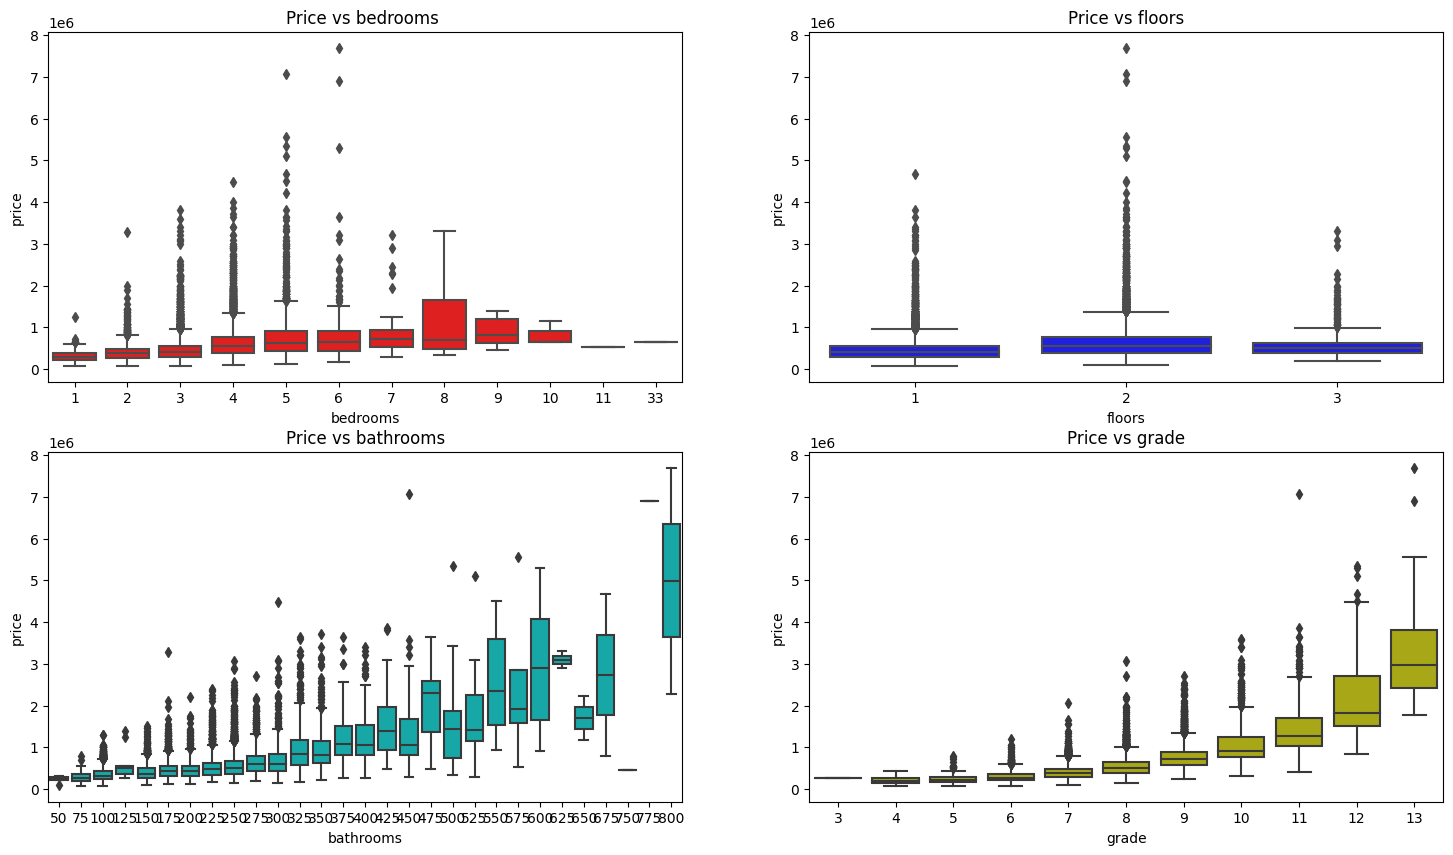

In [25]:
# check the percentile and median base distribution(For visulaising the outliers)
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")

plt.savefig(".\images\outliers.png", dpi = 150, bbox_inches = 'tight')
plt.show()

In [26]:
# We would put everything except for reno_bool and waterfront as we would need a data that we can use to check if renovations can raise
# the prices
columns= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'base_flag']
outliers=[]

for col in columns:
    #print(col)
    mean=np.mean(data[col])
    std=np.std(data[col])
    for i in range(len(data)):
        item = data[col].iloc[i]
        z_score=(item-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)

outliers = set(outliers)
outliers = list(outliers)

In [27]:
# Now we can drop the outliers so we have a more neater dataset
data.drop(data.index[outliers],inplace=True)

Checking the boxplot again for the outliers

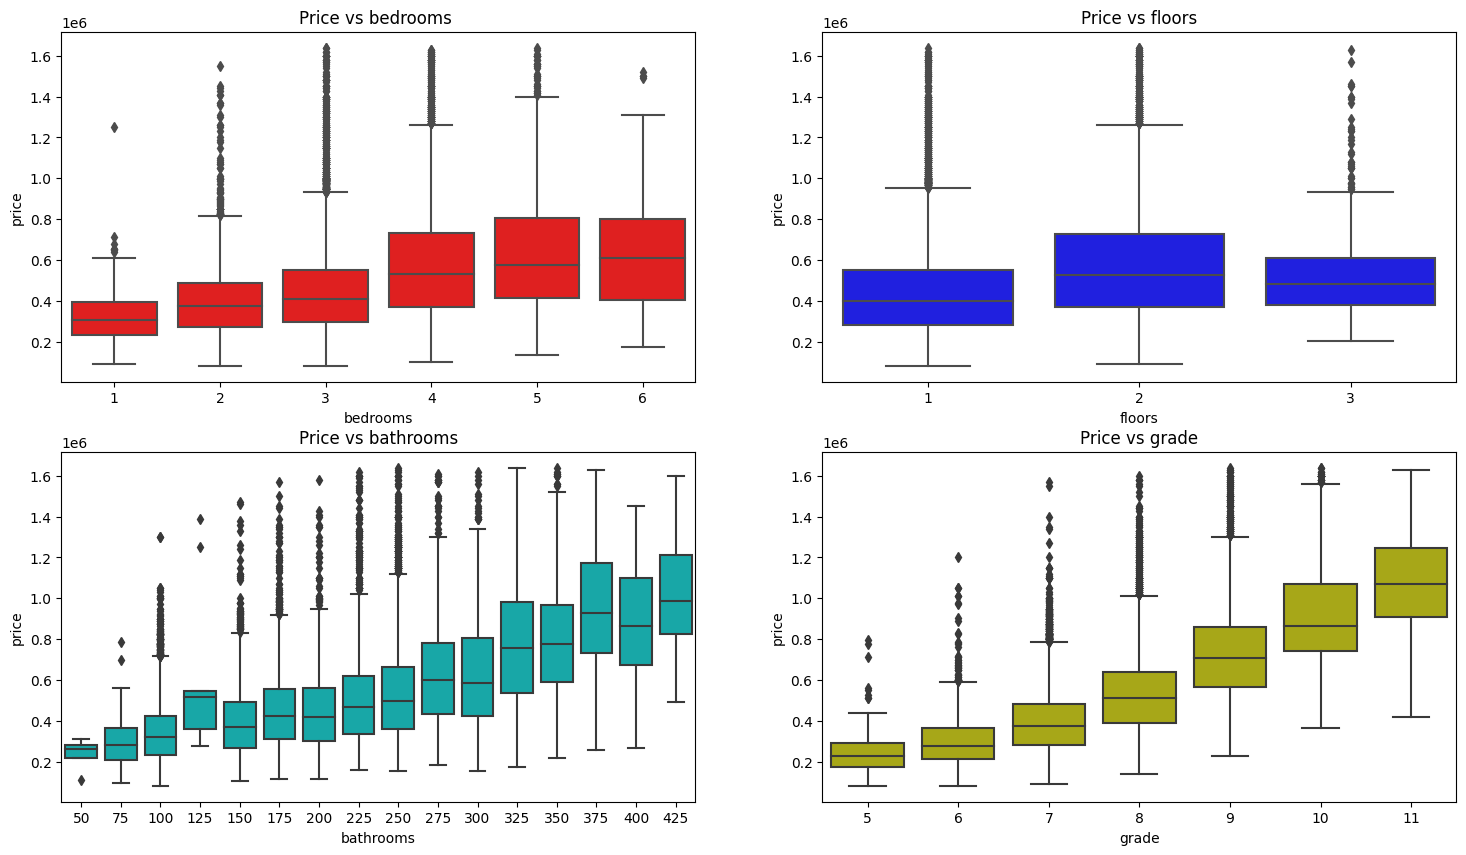

In [28]:
# check the percentile and median base distribution(For visualising the outliers)
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")

plt.show()

# Model 1

In [29]:
outcome = 'price'
predictors = data.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [30]:
model = ols(formula = formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2515.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:            -2.7238e+05
No. Observations:               20341   AIC:                         5.448e+05
Df Residuals:                   20328   BIC:                         5.449e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.476e+06   1.08e+05     50.846      0.000    5.26e+06    5.69e+06
bedrooms    -2.283e+04   1694.075    -13.477      0.000   -2.62e+04   -1.95e+04
bathrooms     313.6804     27.945     11.225      0.000     258.905     368.456
sqft_living   109.8337      5.217     21.053      0.000      99.608     120.060
sqft_lot       -0.7204      0.088     -8.214      0.000      -0.892      -0.549
floors       3.921e+04   2993.757     13.098      0.000    3.33e+04    4.51e+04
waterfront    3.08e+05   1.87e+04     16.498      0.000    2.71e+05    3.45e+05
condition    2.177e+04   1916.335     11.361      0.000     1.8e+04    2.55e+04
grade        1.215e+05   1695.660     71.657      0.000    1.18e+05    1.25e+05
sqft_above      4.1665      5.621      0.741      0.459      -6.852      15.185
yr_built    -3170.5651     55.341    -57.291      0.000   -3279.038   -3062.092
reno_bool     2.06e+04   6606.800      3.118      0.002    7647.173    3.35e+04
base_flag    2.966e+04   4205.357      7.054      0.000    2.14e+04    3.79e+04
==============================================================================
Omnibus:                     3258.276   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9209.290
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       5.812   Cond. No.                     1.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 1 Comments

So far the P-values indicate all independent variables except sqft_above are statistically significant. The adjusted R-squared is at a good value but it could be better by dealing with the categorical data, log transformation and normalization.

Skew is at 0.860 indicates that the model is positively skewed
Kurtosis is at 5.812 which means that it is a leptokurtic curve. Data likely still has some outliers but we need them to get some data from the columns to render them usable.

### Checking Assumptions

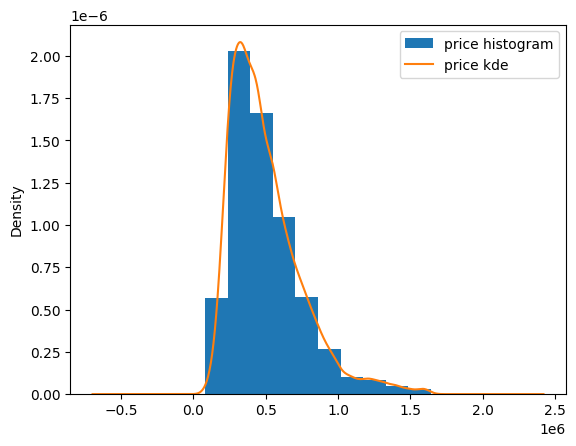

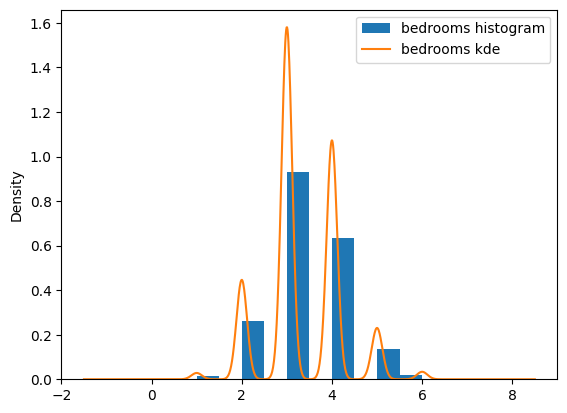

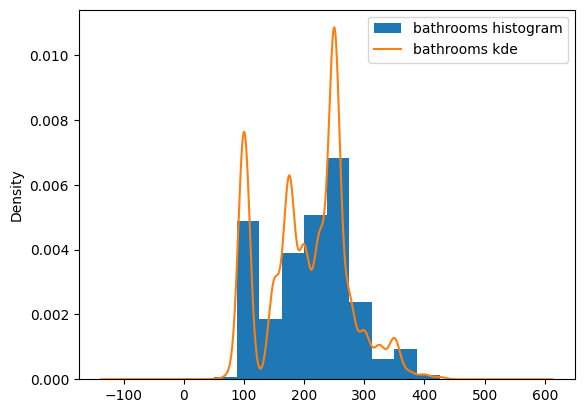

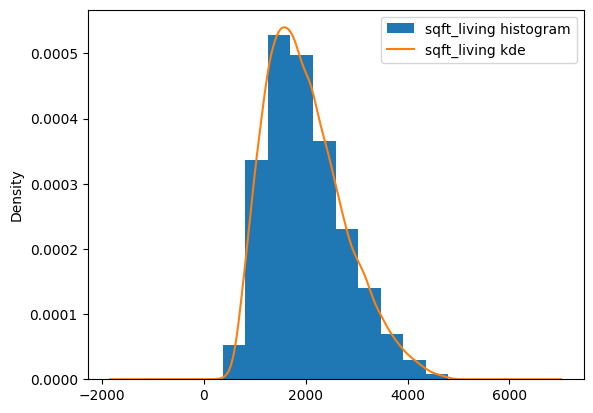

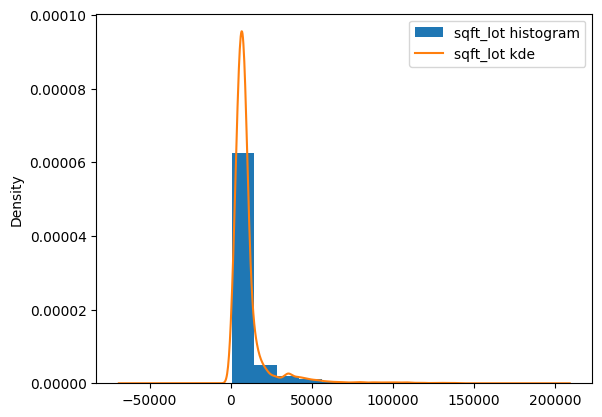

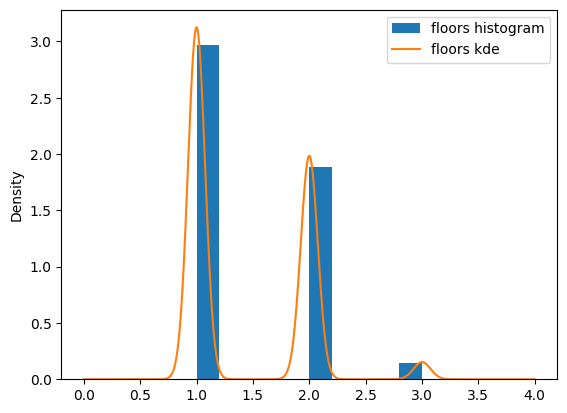

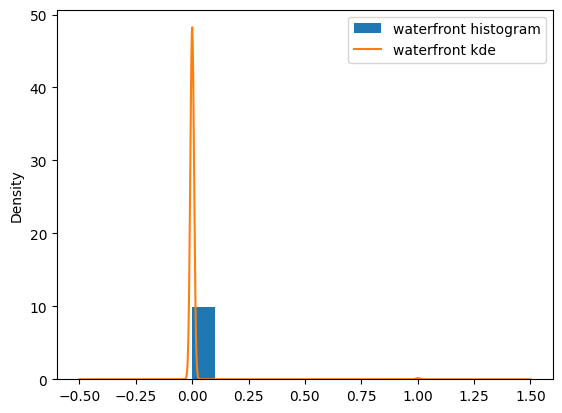

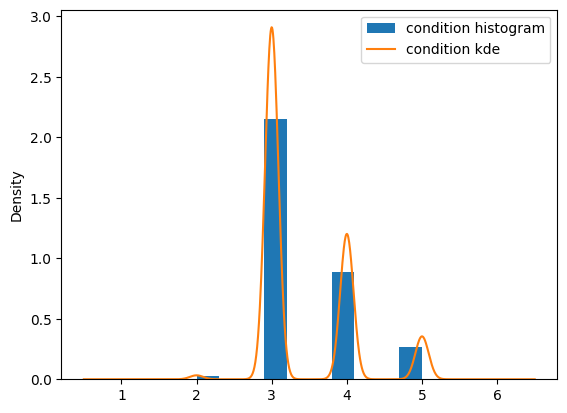

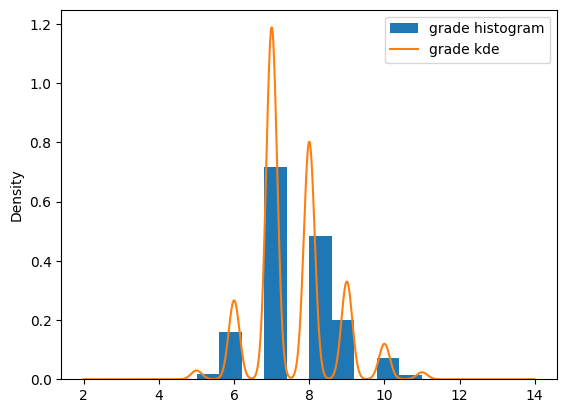

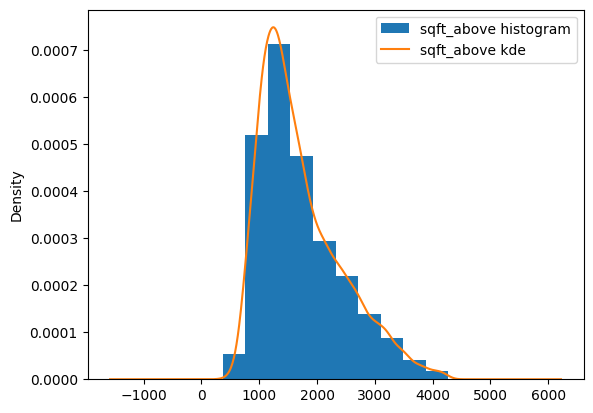

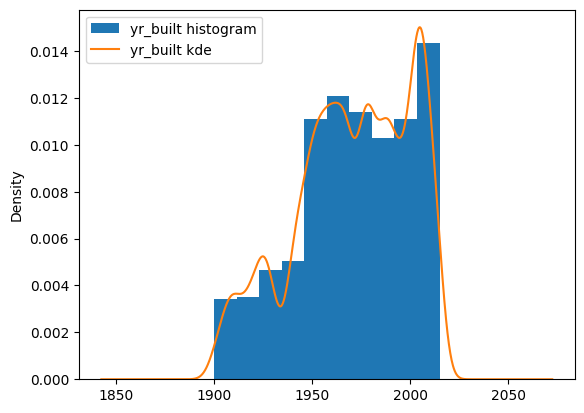

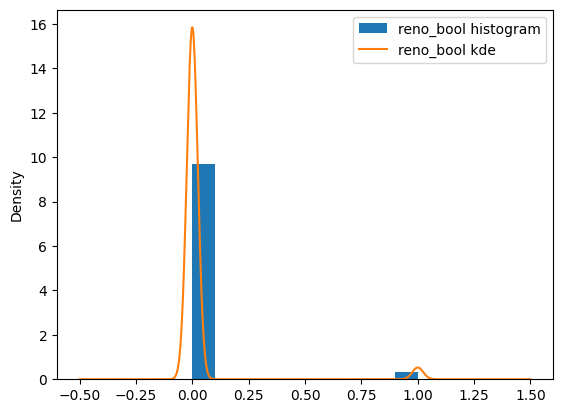

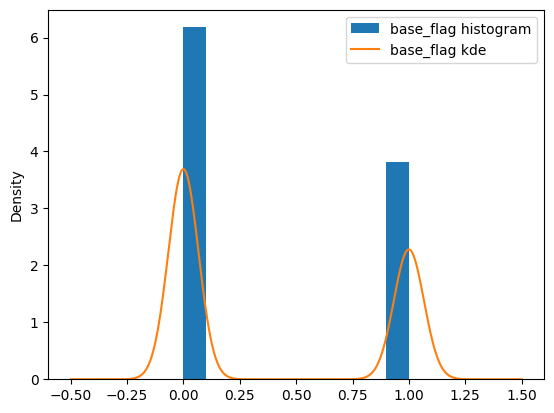

In [31]:
# KDE
for column in data:
    data[column].plot.hist(density=True, label = column +' histogram')
    data[column].plot.kde(label = column + ' kde')
    plt.legend()
    plt.show()


We can see in this histogram that some of the data we have some datas that looks like they are categorical data. We have price, sqft_living and sqft_above have a positively skewed and yr_built as negatively skewed.

# Dealing with categorical data


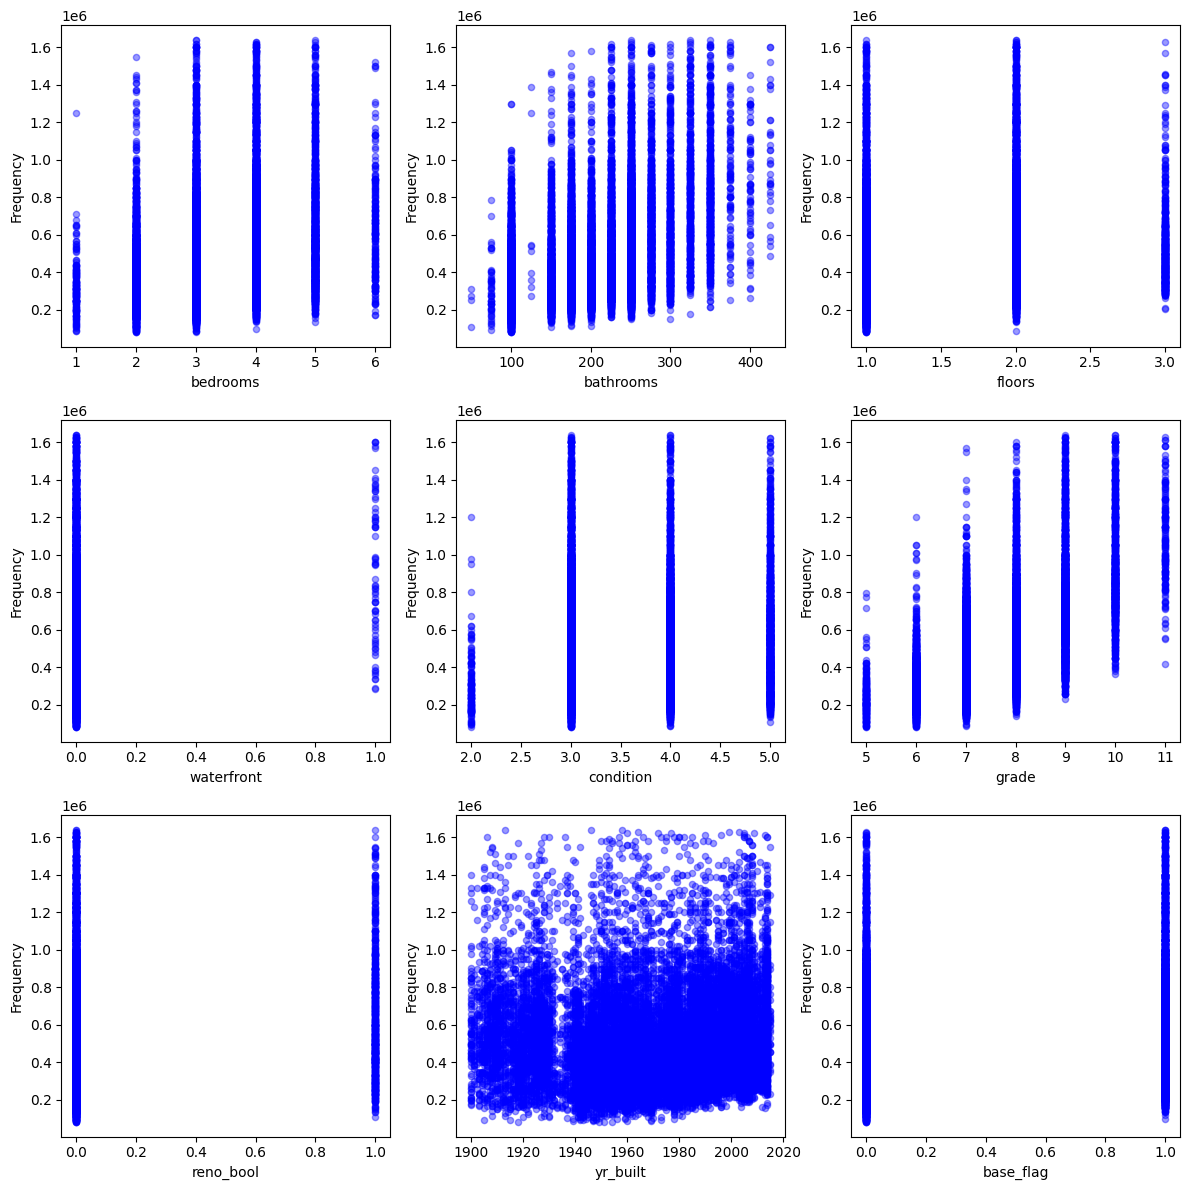

In [32]:
# We should make a histogram and see to confirm that the data we have is categorical
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'reno_bool', 'yr_built', 'base_flag']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    data.plot(kind='scatter', x=column, y='price', ax=axs[row, col], alpha=0.4, color='b')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(".\images\categorical.png", dpi = 150, bbox_inches = 'tight')

plt.show()

We can see that the columns
 - bedrooms
 - bathrooms
 - floors
 - waterfront
 - condition
 - grade
 - reno_bool
 - yr_built
 - base_flag
 
That are in scatter plot are clustered indicating that these are categorical data so we need to make dummies of them so we can use them.

In [33]:
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'reno_bool', 'yr_built', 'base_flag']

In [34]:
bed_dummies = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bath_dummies = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
flr_dummies = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)
wtr_dummies = pd.get_dummies(data['waterfront'], prefix='wtr', drop_first=True)
cond_dummies = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
reno_dummies = pd.get_dummies(data['reno_bool'], prefix='reno', drop_first=True)
yr_built_dummies = pd.get_dummies(data['yr_built'], prefix='yr_built', drop_first=True)
base_dummies = pd.get_dummies(data['base_flag'], prefix='base', drop_first=True)

In [35]:
dummies = pd.concat([bed_dummies, bath_dummies, flr_dummies, wtr_dummies, cond_dummies, grade_dummies, reno_dummies, yr_built_dummies, base_dummies], axis=1)

In [36]:
bed_dummies = pd.get_dummies(data['bedrooms'], prefix='bed')
bath_dummies = pd.get_dummies(data['bathrooms'], prefix='bath')
flr_dummies = pd.get_dummies(data['floors'], prefix='flr')
wtr_dummies = pd.get_dummies(data['waterfront'], prefix='wtr')
cond_dummies = pd.get_dummies(data['condition'], prefix='cond')
grade_dummies = pd.get_dummies(data['grade'], prefix='grade')
reno_dummies = pd.get_dummies(data['reno_bool'], prefix='reno')
yr_built_dummies = pd.get_dummies(data['yr_built'], prefix='yr_built')
base_dummies = pd.get_dummies(data['base_flag'], prefix='base')

In [37]:
dummies_full = pd.concat([bed_dummies, bath_dummies, flr_dummies, wtr_dummies, cond_dummies, grade_dummies, reno_dummies, yr_built_dummies, base_dummies], axis=1)

In [38]:
data1 = data.drop(categorical, axis=1)

### Multicollinearity


to improve the performance of the model and have an accurate co-efficients, highly correlated variables must be removed.

In [39]:
data_pred = data1.iloc[:,1:]

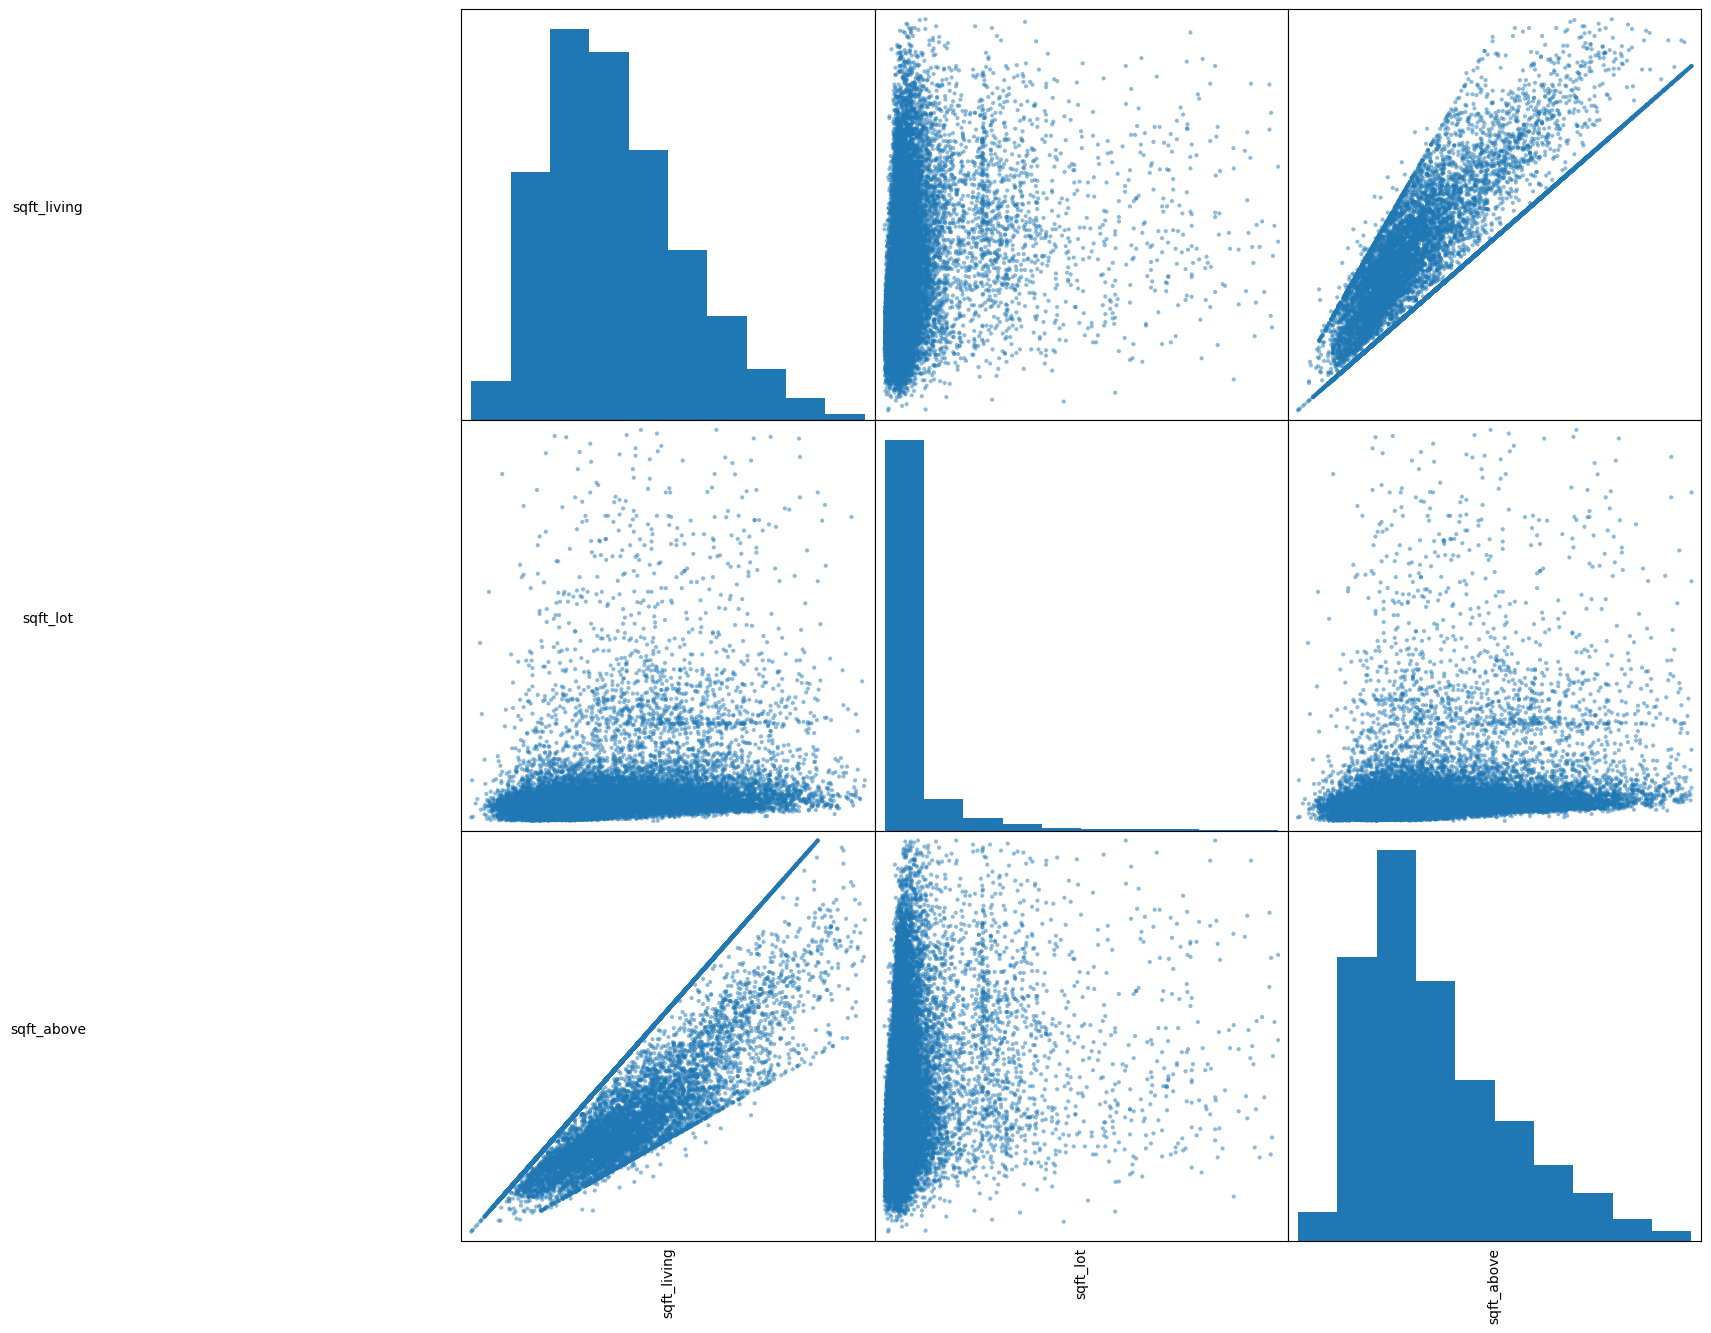

In [40]:
sm = pd.plotting.scatter_matrix(data_pred,figsize  = [16, 16]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [41]:
# Show the correlation in numerical form
data_pred.corr()

,sqft_living,sqft_lot,sqft_above
sqft_living,1.000000,0.219082,0.84521
sqft_lot,0.219082,1.000000,0.20770
sqft_above,0.845210,0.207700,1.00000


In [42]:
abs(data_pred.corr()) > 0.75

,sqft_living,sqft_lot,sqft_above
sqft_living,True,False,True
sqft_lot,False,True,False
sqft_above,True,False,True


In [43]:
# This would show is which pairs has correlation the same so it wouldn't appear multiple times

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
df.drop_duplicates(inplace=True)

In [44]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.84521


### Addressing Multicollinearity
We found out that the variable sqft_above and sqft_living are highly correlated. It would only correct that we should drop one variable of the pair.
In this instance we should drop sqft_above as its description is it is the square footage of the house.

In [45]:
dt = data1.drop(['sqft_above'], axis = 1)

In [46]:
dt.head()

,price,sqft_living,sqft_lot
0,221900.0,1180,5650
1,538000.0,2570,7242
2,180000.0,770,10000
3,604000.0,1960,5000
4,510000.0,1680,8080


### Model 2

In [47]:
dt_1_dummies = pd.concat([dt, dummies], axis = 1)

In [48]:
dt_1_dummies.head()

,price,sqft_living,sqft_lot,bed_2,bed_3,bed_4,bed_5,bed_6,bath_75,bath_100,...,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,base_1
0,221900.0,1180,5650,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,2570,7242,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,180000.0,770,10000,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,1960,5000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,510000.0,1680,8080,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
predictors = dt_1_dummies.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [50]:
model = ols(formula = formula, data = dt_1_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:57:19   Log-Likelihood:            -2.7175e+05
No. Observations:               20341   AIC:                         5.438e+05
Df Residuals:                   20189   BIC:                         5.450e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.487e+04    8.1e+04      0.801      0.423   -9.39e+04    2.24e+05
bed_2[T.True]          -322.5467   1.26e+04     -0.026      0.980    -2.5e+04    2.44e+04
bed_3[T.True]         -2.375e+04   1.26e+04     -1.885      0.060   -4.85e+04     951.723
bed_4[T.True]         -4.199e+04   1.29e+04     -3.263      0.001   -6.72e+04   -1.68e+04
bed_5[T.True]         -4.487e+04   1.36e+04     -3.303      0.001   -7.15e+04   -1.82e+04
bed_6[T.True]         -6.728e+04   1.71e+04     -3.946      0.000   -1.01e+05   -3.39e+04
bath_75[T.True]        9.669e+04   8.01e+04      1.207      0.227   -6.03e+04    2.54e+05
bath_100[T.True]       1.071e+05   7.74e+04      1.384      0.167   -4.46e+04    2.59e+05
bath_125[T.True]       2.189e+05    9.3e+04      2.354      0.019    3.66e+04    4.01e+05
bath_150[T.True]       1.192e+05   7.75e+04      1.537      0.124   -3.28e+04    2.71e+05
bath_175[T.True]       1.335e+05   7.75e+04      1.723      0.085   -1.84e+04    2.85e+05
bath_200[T.True]       1.367e+05   7.75e+04      1.763      0.078   -1.52e+04    2.89e+05
bath_225[T.True]       1.604e+05   7.75e+04      2.068      0.039    8395.913    3.12e+05
bath_250[T.True]       1.489e+05   7.75e+04      1.921      0.055   -3061.195    3.01e+05
bath_275[T.True]       1.683e+05   7.76e+04      2.168      0.030    1.61e+04     3.2e+05
bath_300[T.True]       1.731e+05   7.77e+04      2.227      0.026    2.08e+04    3.25e+05
bath_325[T.True]       2.127e+05   7.79e+04      2.732      0.006    6.01e+04    3.65e+05
bath_350[T.True]        2.14e+05   7.78e+04      2.750      0.006    6.15e+04    3.67e+05
bath_375[T.True]        2.92e+05   7.91e+04      3.694      0.000    1.37e+05    4.47e+05
bath_400[T.True]       2.081e+05   7.98e+04      2.608      0.009    5.17e+04    3.64e+05
bath_425[T.True]       2.758e+05   8.22e+04      3.356      0.001    1.15e+05    4.37e+05
flr_2[T.True]          1.727e+04   3796.128      4.549      0.000    9827.774    2.47e+04
flr_3[T.True]          9.124e+04   7816.824     11.673      0.000    7.59e+04    1.07e+05
wtr_1[T.True]          3.013e+05   1.83e+04     16.450      0.000    2.65e+05    3.37e+05
cond_3[T.True]         4.436e+04   1.29e+04      3.436      0.001    1.91e+04    6.97e+04
cond_4[T.True]         6.563e+04    1.3e+04      5.063      0.000    4.02e+04     9.1e+04
cond_5[T.True]         9.506e+04   1.34e+04      7.100      0.000    6.88e+04    1.21e+05
grade_6[T.True]        5.789e+04   1.12e+04      5.159      0.000    3.59e+04    7.99e+04
grade_7[T.True]        1.606e+05   1.12e+04     14.359      0.000    1.39e+05    1.82e+05
grade_8[T.True]        2.738e+05   1.15e+04     23.725      0.000    2.51e+05    2.96e+05
grade_9[T.True]        4.307e+05   1.21e+04     35.507      0.000    4.07e+05    4.55e+05
grade_10[T.True]       

### Model 2 Summary

After dealing with the multicollinearity the R-squared increased so I believe we are heading in the right direction.

# Transforming our data and normalize it

C:\Users\chuai\AppData\Local\Temp\ipykernel_20332\3554113762.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dt.hist(ax = ax);


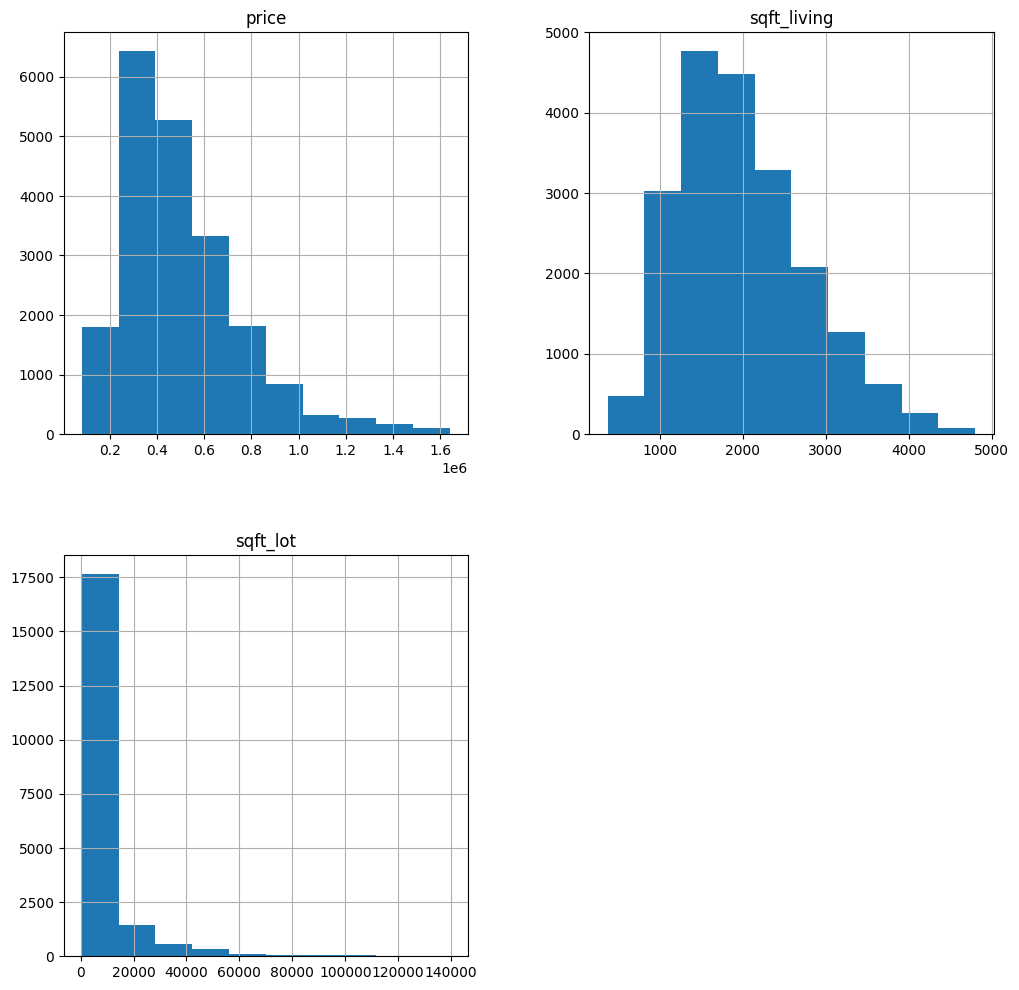

In [51]:
# We want to see what out data looks like in a histogram.
# By looking at our data I believe we should do a log transformation and normalize
# it so we can get the mean, median and mode as close to zero

fig = plt.figure(figsize = (12,12))
ax = fig.gca()
dt.hist(ax = ax);

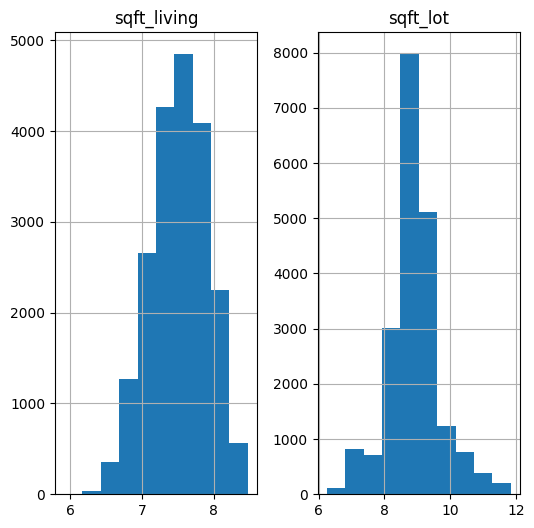

In [52]:
# let's check the transformed data

data_log = pd.DataFrame([])
data_log['sqft_living'] = np.log(dt['sqft_living'])
data_log['sqft_lot'] = np.log(dt['sqft_lot'])
data_log.hist(figsize = [6, 6]);

In [53]:
logliving = data_log['sqft_living']
loglot = data_log['sqft_lot']

# We can normalize the data

scaled_living = (logliving - np.mean(logliving)) / np.sqrt(np.var(logliving))
scaled_lot = (loglot - np.mean(loglot)) / np.sqrt(np.var(loglot))

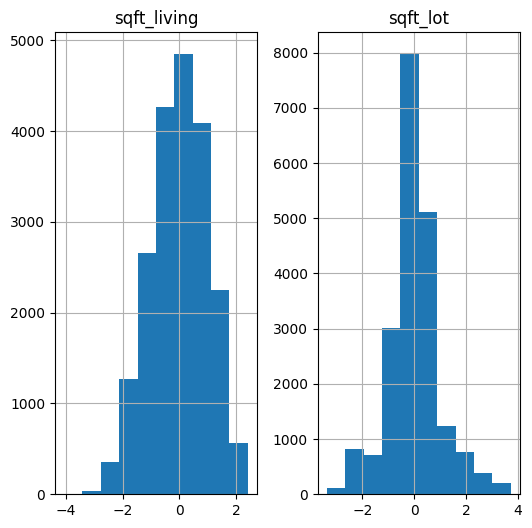

In [54]:
# Let us now check how our data is looking

data_cont_scaled = pd.DataFrame([])

data_cont_scaled['sqft_living'] = scaled_living
data_cont_scaled['sqft_lot'] = scaled_lot

data_cont_scaled.hist(figsize = [6, 6]);

In [55]:
# Let's check our model
dt_1 = pd.concat([dt['price'] ,data_cont_scaled, dummies], axis = 1)

In [56]:
predictors = dt_1.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [57]:
model = ols(formula = formula, data = dt_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:57:29   Log-Likelihood:            -2.7184e+05
No. Observations:               20341   AIC:                         5.440e+05
Df Residuals:                   20189   BIC:                         5.452e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3.312e+05   8.15e+04      4.064      0.000    1.71e+05    4.91e+05
bed_2[T.True]         -2.344e+04   1.27e+04     -1.848      0.065   -4.83e+04    1424.605
bed_3[T.True]         -5.564e+04   1.28e+04     -4.357      0.000   -8.07e+04   -3.06e+04
bed_4[T.True]         -7.121e+04   1.31e+04     -5.436      0.000   -9.69e+04   -4.55e+04
bed_5[T.True]         -6.725e+04   1.38e+04     -4.867      0.000   -9.43e+04   -4.02e+04
bed_6[T.True]         -8.787e+04   1.73e+04     -5.088      0.000   -1.22e+05    -5.4e+04
bath_75[T.True]        1.102e+05   8.04e+04      1.370      0.171   -4.74e+04    2.68e+05
bath_100[T.True]       1.086e+05   7.77e+04      1.397      0.162   -4.38e+04    2.61e+05
bath_125[T.True]       1.952e+05   9.34e+04      2.091      0.037    1.22e+04    3.78e+05
bath_150[T.True]       1.091e+05   7.78e+04      1.401      0.161   -4.35e+04    2.62e+05
bath_175[T.True]       1.207e+05   7.78e+04      1.551      0.121   -3.19e+04    2.73e+05
bath_200[T.True]       1.225e+05   7.78e+04      1.574      0.115      -3e+04    2.75e+05
bath_225[T.True]       1.476e+05   7.79e+04      1.896      0.058   -4996.870       3e+05
bath_250[T.True]       1.376e+05   7.78e+04      1.768      0.077    -1.5e+04     2.9e+05
bath_275[T.True]       1.617e+05   7.79e+04      2.074      0.038    8879.717    3.14e+05
bath_300[T.True]       1.665e+05    7.8e+04      2.133      0.033    1.35e+04    3.19e+05
bath_325[T.True]       2.156e+05   7.82e+04      2.757      0.006    6.23e+04    3.69e+05
bath_350[T.True]       2.221e+05   7.81e+04      2.842      0.004    6.89e+04    3.75e+05
bath_375[T.True]        3.03e+05   7.94e+04      3.817      0.000    1.47e+05    4.59e+05
bath_400[T.True]       2.234e+05   8.01e+04      2.789      0.005    6.64e+04     3.8e+05
bath_425[T.True]       3.044e+05   8.25e+04      3.689      0.000    1.43e+05    4.66e+05
flr_2[T.True]          1.066e+04   3894.482      2.737      0.006    3023.812    1.83e+04
flr_3[T.True]          6.669e+04   8174.403      8.158      0.000    5.07e+04    8.27e+04
wtr_1[T.True]          3.057e+05   1.84e+04     16.587      0.000     2.7e+05    3.42e+05
cond_3[T.True]         4.033e+04    1.3e+04      3.110      0.002    1.49e+04    6.57e+04
cond_4[T.True]         6.228e+04    1.3e+04      4.784      0.000    3.68e+04    8.78e+04
cond_5[T.True]         9.187e+04   1.34e+04      6.831      0.000    6.55e+04    1.18e+05
grade_6[T.True]         4.24e+04   1.13e+04      3.755      0.000    2.03e+04    6.45e+04
grade_7[T.True]        1.334e+05   1.13e+04     11.776      0.000    1.11e+05    1.56e+05
grade_8[T.True]        2.481e+05   1.17e+04     21.135      0.000    2.25e+05    2.71e+05
grade_9[T.True]         4.19e+05   1.23e+04     34.045      0.000    3.95e+05    4.43e+05
grade_10[T.True]       

### Model 3 Summary then compare

After transforming our data bringing back the categorical data. The model looks good and the R-squared of 0.619 is a good value and it looks like the model is most likely at its best fit we can now proceed to model validation

# Validation

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [59]:
y = np.log(dt_1['price'])
X = dt_1.drop('price', axis = 1)

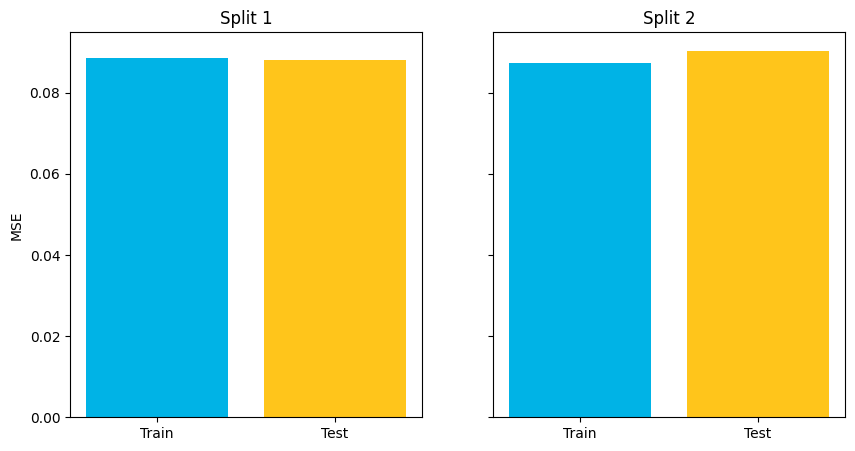

In [60]:
# Set up data and model

linreg = LinearRegression()

# Split using random_state 87
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=87, test_size=0.33)
linreg.fit(X_train_1, y_train_1)
train_mse_1 = mean_squared_error(y_train_1, linreg.predict(X_train_1))
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(X_test_1))

# Split using random_state 41
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=41, test_size=0.33)
linreg.fit(X_train_2, y_train_2)
train_mse_2 = mean_squared_error(y_train_2, linreg.predict(X_train_2))
test_mse_2 = mean_squared_error(y_test_2, linreg.predict(X_test_2))

# Plot metrics
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
left.bar(labels, [train_mse_1, test_mse_1], color=colors)
left.set_title("Split 1")
left.set_ylabel("MSE")
right.bar(labels, [train_mse_2, test_mse_2], color=colors)
right.set_title("Split 2");

### Train - Test Split

We can see that the train and test in both random_state 87 and random_state 41 it only has a few difference.

In [61]:
# Let us now test it at random_state 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [62]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression()

LinearRegression()

Train score and test score add this!!!
train is low and test is high over
under high on both


### Calculating the Mean Squared Error

In [63]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.08851526462905446
Test Mean Squared Error:  0.08664451410150222


In [65]:
train_mse - test_mse

0.0018707505275522424

### Model Validation Comments

The difference is very little that if we round it off at a decimal point in the hundreths it would be at 0.00. I believe that the model is at its best fit.

In [66]:
# Get top 5 variables

from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [67]:
#Get top 3 Variables
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['grade_9', 'grade_10', 'grade_11'], dtype='object')


## Evaluation

After the 3 iterations, we did we found out that the top independent
variables were used to create the final model. Using sklearn's feature selector the variables that have a strong relationship with the dependent variable price.

- grade_11
- grade_10
- grade_9

And to answer key renovation properties that would maximize the properties's market value we have identified the top 5 that would increase the properties which are

- sqft_living - Gaining more square foot of the home can increase the price by 83,010

- flr_3 - having 3 story house would increase the property worth by $66,690

- bath_425 - getting a 4.25 bathrooms can increase the property worth by $304,400

- wtr_1 - having a waterfront view will increase the property worth by $305,700

- grade_11 - Having the King County's building grade of 11 can increase the property worth by $714,500

I believe that this linear regression model answers the business problem of identifying key renovation properties and those that will maximize the property's market value.

If we could have more data to confirm some of the outliers then it might have affected the price. It is quite interesting that the data makes sense in a real world application looking at the results make sense that these justify and increase the price of the house.

## Conclusion

The King County's grading system that we used in this data that represents the quality of the house.
Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

(source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

The results Grade 11, 10 and 9 are the top 3 in our ranking system which is realistic and reflects in the model that we have produced. Renovating the house and improving them in attaining Grade 11, 10 or 9 would increase the value but can add other parts of the house that can increase the value of the house as well.


In conclusion, the main price driver in maximizing the house's market value would

- Investing in high quality material in the renovation and luxury options

- Getting a house have a waterfront view, if possible

- Adding more bathrooms